# Gun Violence in US Cities, 2014-2017

- I want to determine which cities were the most violent in the years 2014-2017 (the years for which I have complete data).
- I also want to differentiate between *large* cities and *all* cities. Larger cities (Chicago specifically) are notorious for their total number of gun deaths, but if we look at per capita rates, the findings might be surprising.

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

I'll read in the large 'gun death' dataframe that I cleaned in the first notebook.

In [169]:
df = pd.read_csv('../data/guns2.csv', index_col=0)

I'll need to reformat it a bit. 'City' is easier for me to parse than 'city_or_state.'

In [170]:
df.rename(columns={'city_or_county':'city'}, inplace=True)

Through EDA in previous notebooks, I've determined that the numbers for New York are off. Let's take a closer look:

In [171]:
df[(df['state']=='New York')&(df['city']!='New York')].head()

,state,city,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
date,,,,,,,,,,,,,,,,,,,,,
2013-03-13,New York,Mohawk,17 W Main St,6,2,http://www.gunviolencearchive.org/incident/482856,http://www.syracuse.com/news/index.ssf/2013/03...,0.0,22.0,0::Unknown,...,0::68||1::57||2::66||3::67||4::62||5::51||6::2...,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||4::Male||5::Male||6...,0::Harry Montgomery||1::Michael Ransear||2::Jo...,7::Aquaintance,0::Killed||1::Killed||2::Injured||3::Injured||...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/upstate-new-york-s...,101.0,51.0
2013-03-22,New York,Brooklyn,2703 W. 33rd Street,1,3,http://www.gunviolencearchive.org/incident/483788,http://www.nytimes.com/2013/03/23/nyregion/man...,0.0,8.0,NaN,...,0::62||1::24||3::40||4::29,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male||4::Male,4::Joseph Brown,NaN,0::Injured||1::Injured||2::Killed||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.usatoday.com/story/news/nation/2013...,46.0,23.0
2013-04-07,New York,New York (Manhattan),900 Garden Way,1,3,http://www.gunviolencearchive.org/incident/483872,http://www.jcpost.com/2013/04/08/riley-county-...,0.0,16.0,NaN,...,0::22||1::23||2::23||3::22||4::43,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Female||2::Female||3::Male||4::Male,0::Michael T. Lowery||1::Christine Kim||2::Ale...,NaN,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.wibw.com/home/localnews/headlines/O...,81.0,36.0
2013-05-18,New York,Jamaica,Sutphin Blvd and Rockaway Blvd,1,0,http://www.gunviolencearchive.org/incident/873575,http://qns.com/story/2017/06/22/second-shooter...,0.0,5.0,0::Unknown,...,0::14||1::15||2::21,0::Teen 12-17||1::Teen 12-17||2::Adult 18+,0::Female||1::Male||2::Male,0::D'aja Robinson||1::Shamel Capers||2::Kevin ...,NaN,0::Killed||1::Arrested||2::Arrested,0::Victim||1::Subject-Suspect||2::Subject-Suspect,http://newyork.cbslocal.com/2014/07/30/second-...,32.0,10.0
2013-06-30,New York,Brooklyn,616 E. 52nd Street,0,9,http://www.gunviolencearchive.org/incident/490226,http://www.wptv.com/news/national/brooklyn-sho...,0.0,9.0,NaN,...,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Female|...,NaN,NaN,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://rogersparkbench.blogspot.com/2013/06/se...,58.0,21.0


It appears that homicides for New York are encoded by their burough. For Brooklyn and Queens, they're encoded by neighborhood. To fix this, I'm going to make an exhaustive list of all buroughs and neighborhoods and enocde them all as "New York."

In [172]:
nyc = ['New York', 'New York (New York City)', 'New York (Manhattan)', 'Manhattan', 'Staten Island', 'Brooklyn', 
       'Bronx', 'Queens', 'Jamaica', 'Corona (Queens)',  'Far Rockaway', 'Far Rockaway (Rockaway Beach)', 
       'Arverne (Queens)', 'Flushing', 'Ozone Park', 'South Ozone Park', 'Astoria', 'Bayside', 'Richmond Hill',
       'South Richmond Hill', 'Long Island City', 'Ridgewood', 'Jackson Heights', 'Astoria Heights', 'Ditmars', 
       'Little Egypt', 'Blissvile', 'Hunters Point', 'Dutch Kills', 'Queensbridge', 'Queensview', 'Queens West', 
       'Ravenswood', 'Sunnyside', 'Sunnyside Gardends', 'Woodside', 'Bay Terrace', 'Oakland Gardens', 'Bellerose', 'College Point',
       'Douglaston', 'Pomonok', 'Floral Park', 'Forest Hills', 'Fort Totten', 'Glen Oaks', 'North Shore Towers', 'Little Neck', 
       'Whitestone', 'Springfield Gardens (Laurelton)','Jamaica (Jfk Airport)']
for i in df.city:
    if i in nyc:
        df.city.replace(i, 'New York', inplace=True)

I'll save this updated dataframe to a csv.

In [173]:
df.to_csv('../data/guns2_clean.csv')

I need to make separate dataframes for each year, 2014-2017:

In [174]:
df_2014 = df.loc['2014-01-01':'2014-12-31']
df_2015 = df.loc['2015-01-01':'2015-12-31']
df_2016 = df.loc['2016-01-01':'2016-12-31']
df_2017 = df.loc['2017-01-01':'2017-12-31']

And let's make sure that this looks right:

In [175]:
df_2014.head()

,state,city,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,New Jersey,Jersey City,Monticello and Jewett Avenues,0,1,http://www.gunviolencearchive.org/incident/92400,http://www.nj.com/hudson/index.ssf/2014/01/ret...,0.0,10.0,NaN,...,0::41||1::63,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"1::James D. Corley, Jr.",NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.nj.com/hudson/index.ssf/2014/01/ret...,31.0,31.0
2014-01-01,Wisconsin,Milwaukee,4700 block of N. 50th St,0,1,http://www.gunviolencearchive.org/incident/92307,http://www.jsonline.com/news/crime/fatal-shoot...,0.0,4.0,NaN,...,0::28,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.jsonline.com/news/crime/fatal-shoot...,17.0,6.0
2014-01-01,Tennessee,Humboldt,NaN,0,0,http://www.gunviolencearchive.org/incident/92519,http://www.wbbjtv.com/news/local/Shots-Fired-i...,0.0,8.0,NaN,...,0::26,0::Adult 18+,0::Male,0::Justin David Glasper,NaN,0::Unharmed,0::Subject-Suspect,http://www.wbbjtv.com/news/local/Shots-Fired-i...,79.0,24.0
2014-01-01,Virginia,Chesapeake,405 Shell Rd,0,0,http://www.gunviolencearchive.org/incident/95244,http://wtkr.com/2014/01/02/bullet-goes-through...,0.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0::Victim,http://wtkr.com/2014/01/02/bullet-goes-through...,81.0,14.0
2014-01-01,Ohio,Cleveland,12108 Marne Av,0,1,http://www.gunviolencearchive.org/incident/92251,http://fox8.com/2014/01/01/police-landlord-arr...,0.0,9.0,NaN,...,0::50,0::Adult 18+||1::Adult 18+,0::Male,NaN,NaN,0::Injured||1::Unharmed,0::Victim||1::Subject-Suspect,http://fox8.com/2014/01/01/police-landlord-arr...,13.0,23.0


In [176]:
pd.options.mode.chained_assignment = None

^ I need to run the above line of code to format my city dataframes correctly

Because when I'm looking at smaller cities city names repeat (Richmond or Springfield, for example), I want to format these to be in "City, State" format. I also want to sort them by number killed. I'll write a quick function for this:

In [177]:
def city(year):
    year['city'] = year['city'] + ', ' + year['state']
    year.drop('state', axis=1, inplace=True)
    return pd.DataFrame(year.groupby(['city']).n_killed.sum().sort_values(ascending=False))

Now I'll run this on each year and save the variables:

In [178]:
cities_2014 = city(df_2014)
cities_2015 = city(df_2015)
cities_2016 = city(df_2016)
cities_2017 = city(df_2017)

Again, I want to call .head() and make sure this looks right:

In [226]:
cities_2016.head()

,n_killed,2016_pop,pc_killed
city,,,
"Chicago, Illinois",591,2720275,21.725745
"Houston, Texas",289,2304482,12.540779
"Baltimore, Maryland",264,616958,42.790595
"Philadelphia, Pennsylvania",221,1574765,14.033840
"New York, New York",210,8615426,2.437488


Next, I'm going to read in my Census Bureau csv file in order to calculate per capita rates based on yearly populations:

In [180]:
pop = pd.read_csv('../data/city_pops.csv', header=1, index_col='Rank')

In [181]:
pop.head()

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geography.1,Geography.2,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017
Rank,,,,,,,,,,,,,,,,,
1,0100000US,NaN,United States,1620000US3651000,3651000,"United States - New York city, New York","New York city, New York",8175133,8174959,8193703,8292688,8383504,8458642,8521135,8582459,8615426,8622698
2,0100000US,NaN,United States,1620000US0644000,644000,"United States - Los Angeles city, California","Los Angeles city, California",3792621,3792724,3796060,3824592,3859267,3891783,3922668,3953459,3981116,3999759
3,0100000US,NaN,United States,1620000US1714000,1714000,"United States - Chicago city, Illinois","Chicago city, Illinois",2695598,2695620,2697661,2706670,2717989,2724482,2726533,2725154,2720275,2716450
4,0100000US,NaN,United States,1620000US4835000,4835000,"United States - Houston city, Texas","Houston city, Texas",2099451,2094433,2099256,2125450,2159824,2198244,2238795,2282235,2304482,2312717
5,0100000US,NaN,United States,1620000US0455000,455000,"United States - Phoenix city, Arizona","Phoenix city, Arizona",1445632,1446909,1449039,1467519,1495880,1521182,1547729,1575039,1602042,1626078


These city names are redundant, so I'll use some regex to clean them up:

In [182]:
pop['Geography.2'].replace('city.+', "", regex=True, inplace=True)

In [183]:
pop['Geography.1'].replace('^(.+?),', "", regex=True, inplace=True)

In [184]:
pop = pop[['Geography.2', 'Geography.1', 'Population Estimate (as of July 1) - 2014',
           'Population Estimate (as of July 1) - 2015', 'Population Estimate (as of July 1) - 2016',
           'Population Estimate (as of July 1) - 2017']]

In [185]:
pop.rename(columns= {'Geography.2':'city', 'Geography.1':'state', 
                     'Population Estimate (as of July 1) - 2014': '2014_pop',
                     'Population Estimate (as of July 1) - 2015': '2015_pop',
                     'Population Estimate (as of July 1) - 2016': '2016_pop',
                     'Population Estimate (as of July 1) - 2017':'2017_pop' }, inplace=True)

In [186]:
pop['city'] = pop['city'].str.strip()

In [187]:
pop['state'] = pop['state'].str.strip()

In [188]:
pop['city'] = pop['city'] + ", " + pop['state']

In [189]:
pop.set_index(['city'], inplace=True)

In [190]:
pop.drop('state', axis= 1, inplace=True)

Now I want to make sure these are formatted correctly:

In [191]:
pop.tail()

,2014_pop,2015_pop,2016_pop,2017_pop
city,,,,
"Poway, California",49774,50018,50080,50041
"Troy, New York",50038,49882,49703,49565
"Saginaw, Michigan",49773,49201,48869,48677
"Niagara Falls, New York",49252,48941,48687,48460
"Charleston, West Virginia",50109,49431,48769,47929


This looks good. Now I want to merge my population and gun death dataframes. I can use another function for that:

In [192]:
def merger(df, sub_df):
    df = pd.merge(df, sub_df, left_index=True, right_index=True)
    df['pc_killed'] = (df.iloc[:,0] /df.iloc[:,1]) * 100000
    return df

running this function on each year:

In [193]:
cities_2014 = merger(cities_2014, pop[['2014_pop']])
cities_2015 = merger(cities_2015, pop[['2015_pop']])
cities_2016 = merger(cities_2016, pop[['2016_pop']])
cities_2017 = merger(cities_2017, pop[['2017_pop']])                                  

checking to make sure this is formatted correctly:

In [196]:
cities_2017.head()

,n_killed,2017_pop,pc_killed
city,,,
"Chicago, Illinois",574,2716450,21.130520
"Baltimore, Maryland",303,611648,49.538297
"Houston, Texas",264,2312717,11.415145
"Philadelphia, Pennsylvania",223,1580863,14.106219
"Las Vegas, Nevada",214,641676,33.350164


Saving all of these as csv files:

In [197]:
top_cities_2014 = cities_2014.sort_values('pc_killed', ascending=False).head(20)
top_cities_2014.to_csv('../data/top_cities_2014.csv')

top_cities_2015 = cities_2015.sort_values('pc_killed', ascending=False).head(20)
top_cities_2015.to_csv('../data/top_cities_2015.csv')


top_cities_2016 = cities_2016.sort_values('pc_killed', ascending=False).head(20)
top_cities_2016.to_csv('../data/top_cities_2016.csv')

top_cities_2017 = cities_2017.sort_values('pc_killed', ascending=False).head(20)
top_cities_2017.to_csv('../data/top_cities_2017.csv')

And now I want to look at large cities specifically. I'll also reformat the 'city' column so that only the name of the city is displayed:

In [228]:
top_large_cities_2014 = cities_2014[cities_2014['2014_pop']>=500000].sort_values('pc_killed', ascending=False).head(20)
top_large_cities_2014 = top_large_cities_2014.reset_index()
top_large_cities_2014['city'], top_large_cities_2014['state'] = top_large_cities_2014.city.str.split(', ', 1).str
top_large_cities_2014.set_index('city', inplace=True)
top_large_cities_2014.to_csv('../data/top_large_cities_2014.csv')

top_large_cities_2015 = cities_2015[cities_2015['2015_pop']>=500000].sort_values('pc_killed', ascending=False).head(20)
top_large_cities_2015 = top_large_cities_2015.reset_index()
top_large_cities_2015['city'], top_large_cities_2015['state'] = top_large_cities_2015.city.str.split(', ', 1).str
top_large_cities_2015.set_index('city', inplace=True)
top_large_cities_2015.to_csv('../data/top_large_cities_2015.csv')

top_large_cities_2016 = cities_2016[cities_2016['2016_pop']>=500000].sort_values('pc_killed', ascending=False).head(20)
top_large_cities_2016 = top_large_cities_2016.reset_index()
top_large_cities_2016['city'], top_large_cities_2016['state'] = top_large_cities_2016.city.str.split(', ', 1).str
top_large_cities_2016.set_index('city', inplace=True)
top_large_cities_2016.to_csv('../data/top_large_cities_2016.csv')

top_large_cities_2017 = cities_2017[cities_2017['2017_pop']>=500000].sort_values('pc_killed', ascending=False).head(20)
top_large_cities_2017 = top_large_cities_2017.reset_index()
top_large_cities_2017['city'], top_large_cities_2017['state'] = top_large_cities_2017.city.str.split(', ', 1).str
top_large_cities_2017.set_index('city', inplace=True)
top_large_cities_2017.to_csv('../data/top_large_cities_2017.csv')

And once again making sure that this is formatted the way I want it to be:

In [243]:
top_large_cities_2017.head()

,n_killed,2017_pop,pc_killed,state
city,,,,
Baltimore,303,611648,49.538297,Maryland
Las Vegas,214,641676,33.350164,Nevada
Memphis,165,652236,25.297592,Tennessee
Detroit,160,673104,23.770472,Michigan
Chicago,574,2716450,21.130520,Illinois


I'll write a function to make a visualization for each 'top US city' by year:

In [230]:
def plot_top(df, title, file):
    
    sns.set(style="white")

    f, ax = plt.subplots(figsize=(10, 8))
    colors = ['crimson' if x=='Baltimore, Maryland' else 'black' for x in df.index]
    sns.barplot(x=df.pc_killed, 
            y=df.index,
            data=df, palette=colors)


    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Gun Deaths per 100k',fontsize=16)
    ax.set_ylabel("")
    plt.tick_params(labelsize='large')
       
    sns.despine(left=True, bottom=True)
    plt.savefig(file)

I'll run this function on each year.

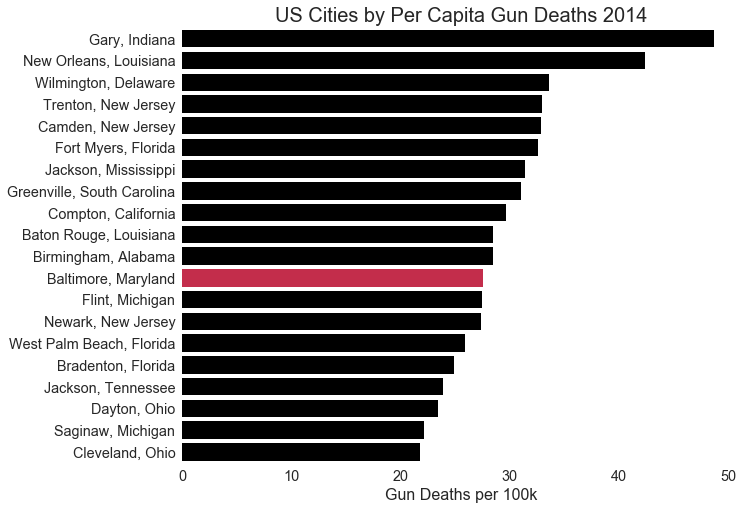

In [231]:
plot_top(top_cities_2014, "US Cities by Per Capita Gun Deaths 2014", '../images/top_cities_2014.png')

Looking at all cities regardless of population, I see that Gary, Indiana is the most violent, with almost 50 deaths per 100k residents. Having domain knowledge of most of the east coast cities on this list as well as many in the South, I am not surprised by this listing. That being said, I'm unfamiliar with some of the listings towards the bottom, specifically the locations in Florida. Saginaw, Michigan was also a surprise to me. 

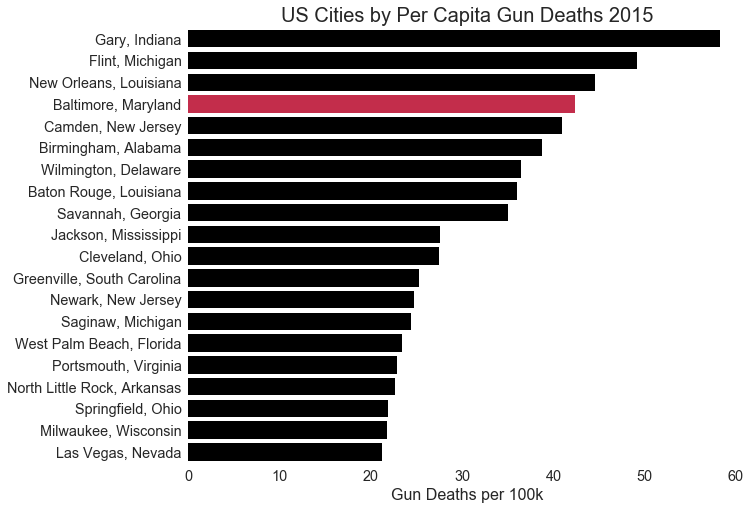

In [232]:
plot_top(top_cities_2015, "US Cities by Per Capita Gun Deaths 2015", '../images/top_cities_2015.png')

Many of the cities in 2015 are repeat offenders from 2014. I do notice that Baltimore has jumped from 12th in the list to 4th.

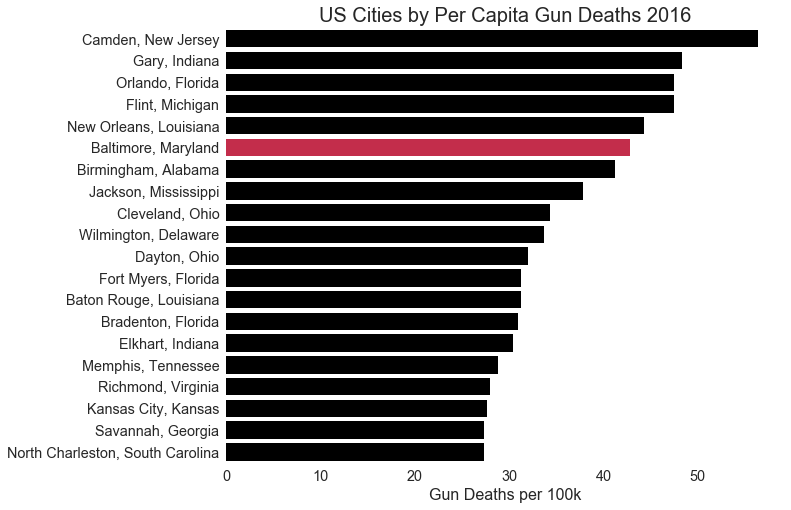

In [233]:
plot_top(top_cities_2016, "US Cities by Per Capita Gun Deaths 2016", '../images/top_cities_2016.png')

What's interesting to note from this listing is the inclusion of Orlando, which I have to imagine is because of the Pulse night club shooting on June 12, 2016.

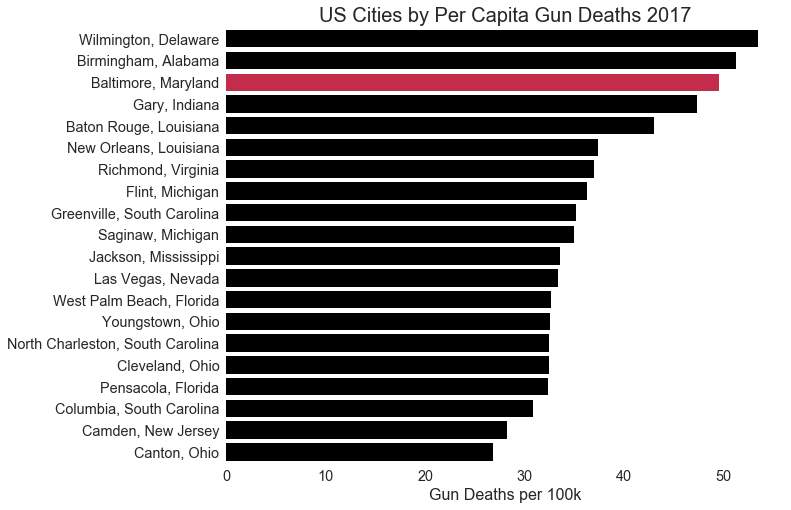

In [234]:
plot_top(top_cities_2017, "US Cities by Per Capita Gun Deaths 2017", '../images/top_cities_2017.png')

Baltimore has jumped from 6th to 3rd. Wilmington has jumped from 10th to 1st. Other than that, most of the cities are repeats from the previous years.

And now I want to do the same exact thing except for large cities specifically:

In [236]:
def plot_large(df, title, file):
    
    sns.set(style="white")

    f, ax = plt.subplots(figsize=(10, 8))
    colors = ['crimson' if x=='Baltimore' else 'black' for x in df.index]
    sns.barplot(x=df.pc_killed, 
            y=df.index,
            data=df, palette=colors)

    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Gun Deaths per 100k',fontsize=16)
    ax.set_ylabel("")
    plt.tick_params(labelsize='large')

    sns.despine(left=True, bottom=True)
    plt.savefig(file)

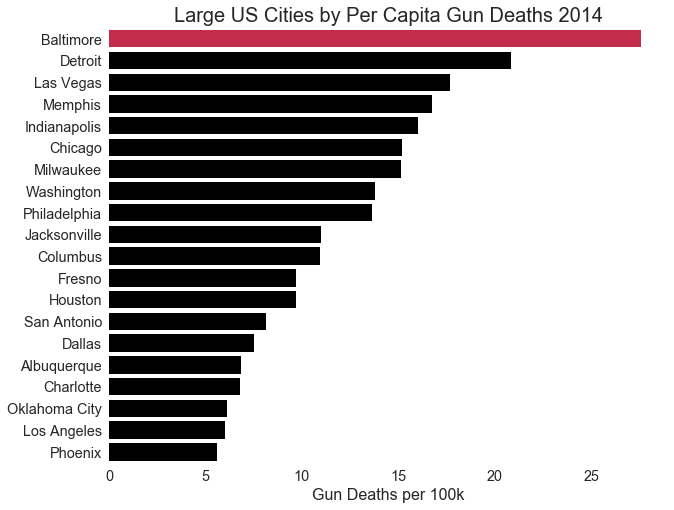

In [237]:
plot_large(top_large_cities_2014, "Large US Cities by Per Capita Gun Deaths 2014",
           '../images/large_cities_2014.png')

Unsurprisingly, Baltimore tops the list of 'large' cities in 2014 and will for every other year that follows. Note the numbers on the X axis... we'll see these grow each year.

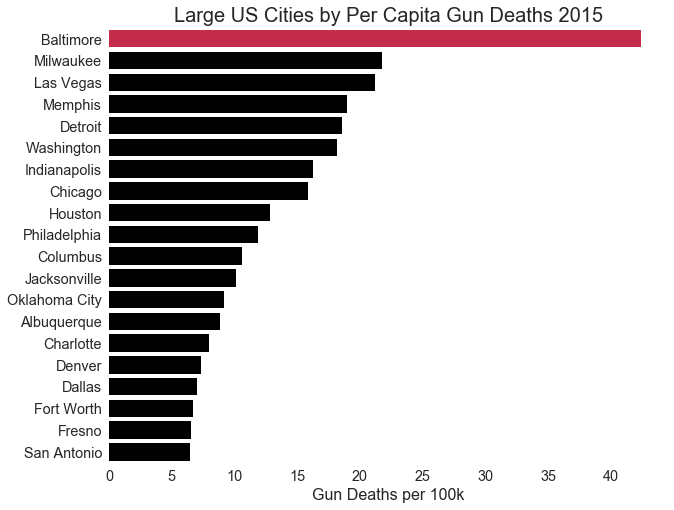

In [238]:
plot_large(top_large_cities_2015, "Large US Cities by Per Capita Gun Deaths 2015",
           '../images/large_cities_2015.png')

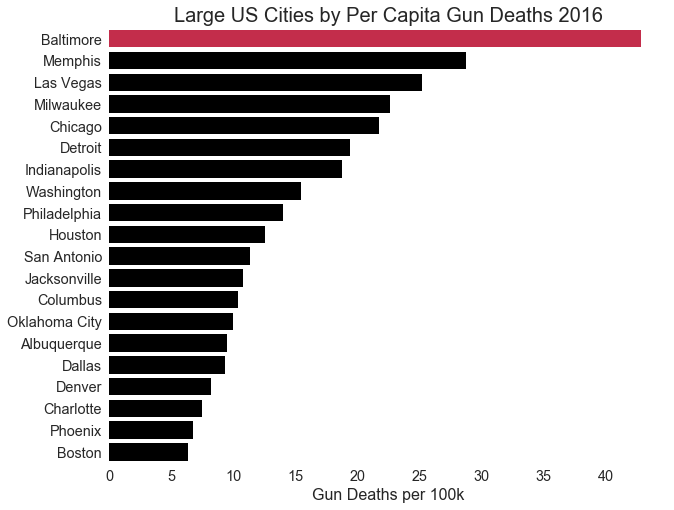

In [239]:
plot_large(top_large_cities_2016, "Large US Cities by Per Capita Gun Deaths 2016",
           '../images/large_cities_2016.png')

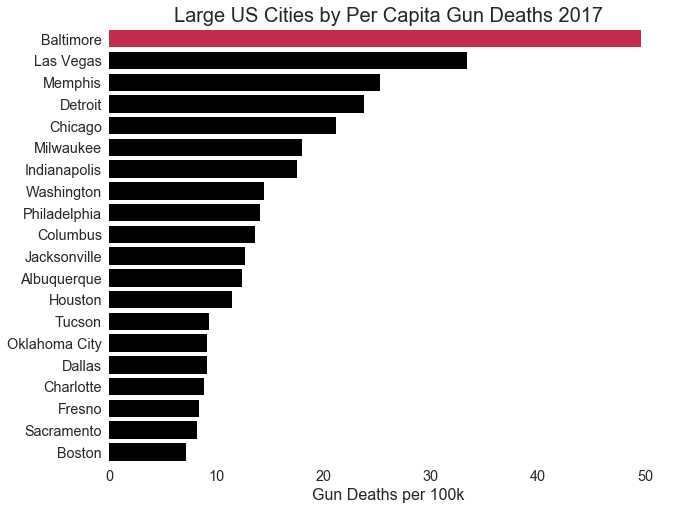

In [240]:
plot_large(top_large_cities_2017, "Large US Cities by Per Capita Gun Deaths 2017",
           '../images/large_cities_2017.png')

2017 is a notable year for a couple of reasons. Firstly, we can see how much worse the violence in Baltimore has gotten–it's at ~50 deaths for every 100k residents. Secondly, we can see how the mass shooting at the Mandalay Bay Hotel in Las Vegas has moved that city's per capita rate up significantly.

Main takeaway: 

The city data from the years 2014-2017 points toward a worsening epidemic of gun violence in American cities. We also see that many cities are perennially violent from year to year. These cities span different regions nationally and cover both Red and Blue states, as well as states with dramatically different gun laws. Maryland and California each have fairly strict gun laws, for example, yet each has at least one city in the top 20. It would seem that state and local gun laws only go so far in preventing gun violence... we see success stories in New York and Los Angeles, yet there are enough exceptions to this rule to lend credence to the argument that new Federal laws would be in order.